### HOUSE PRICING

In [53]:
##DATA DESCRIPTION
myfile = open("./house-prices-data/data_description.txt")
txt = myfile.read()
print(txt)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [54]:
#libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
pd.options.mode.chained_assignment = None
import h2o

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [55]:
train = pd.read_csv('./house-prices-data/train.csv') 
test = pd.read_csv('./house-prices-data/test.csv')

In [56]:
## DATA CLEANING AND FEATURE ENGINEERING

In [57]:
# Drop the id column from both test and training data
train.drop(['Id'],axis=1, inplace=True)
test.drop(['Id'],axis=1, inplace=True)

In [58]:
print('The shape of train data is {}'.format(train.shape))
print('The shape of test data is {}'.format(test.shape))

The shape of train data is (1460, 80)
The shape of test data is (1459, 79)


In [59]:
#concat both the datasets for easier cleaning 
full = train.append(test, ignore_index=True)

In [60]:
print('The shape of full data is {}'.format(full.shape))

The shape of full data is (2919, 80)


In [61]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


### Cleaning Data Set


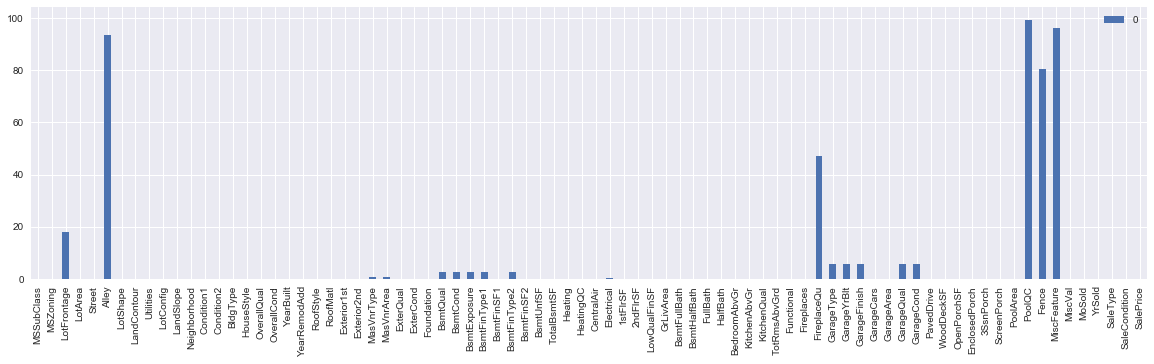

In [67]:
pd.DataFrame(train.isna().sum()*100/train.shape[0]).plot.bar(figsize=(20,5))

* the above plot gives us a summary as percent values for all the variables in the training dataset. 
* For the variables with huge proportion of missing value: Alley, PoolQC, Fence and MiscFeature, it's proper to replace NA value with None. Since None is also a type
* Replaced null values with None in the FireplaceQu column both in test and training set.

In [68]:
## IMPUTING MISSING VALUES

In [69]:
#NA already existing category
full.update(full[['BsmtCond','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtQual','GarageType','GarageQual','GarageFinish','GarageCond','FireplaceQu','MiscFeature','Fence','PoolQC','Alley']].fillna('NA'))

#none a new category generated
full.update(full[['Electrical','MasVnrType']].fillna('None'))



#nan with zero as constant
full.update(full[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtHalfBath','BsmtFullBath','GarageArea','GarageCars','MasVnrArea','TotalBsmtSF']].fillna(0)) #no basement so areas are zero

In [70]:
# Replacing the missing values with medians for the list of variables ['Exterior1st','Exterior2nd','Functional','KitchenQual','MSZoning','SaleType','Utilities']

full['Exterior1st']=full['Exterior1st'].fillna(full.Exterior1st.value_counts().index[0])
full['Exterior2nd']=full['Exterior2nd'].fillna(full.Exterior2nd.value_counts().index[0])
full['Functional']=full['Functional'].fillna(full.Functional.value_counts().index[0])
full['KitchenQual']=full['KitchenQual'].fillna(full.KitchenQual.value_counts().index[0])
full['MSZoning']=full['MSZoning'].fillna(full.MSZoning.value_counts().index[0])
full['SaleType']=full['SaleType'].fillna(full.SaleType.value_counts().index[0])
full['Utilities']=full['Utilities'].fillna(full.Utilities.value_counts().index[0])

In [71]:
#filled missing garage years
full['GarageYrBlt'] = full['GarageYrBlt'].fillna(full['YearBuilt'])

In [72]:
#spillitng the data again

train = full[full['SalePrice'].notnull()]
test = full[full['SalePrice'].isnull()]

In [73]:
train_y = train['SalePrice']
train_x = train.drop(['SalePrice'],axis=1)

In [74]:
test_x = test.drop(['SalePrice'],axis=1)

In [75]:
test_x.shape

(1459, 79)

In [76]:
train_x.shape

(1460, 79)

In [77]:
# Get train LotFrontage dummy variables
LotFrontage_Dummies_df = pd.get_dummies(train_x[['LotFrontage', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood']])

# Get full dummy variables
# Split the data into LotFrontage known and LotFrontage unknown
LotFrontageKnown = LotFrontage_Dummies_df[LotFrontage_Dummies_df["LotFrontage"].notnull()]
LotFrontageUnknown = LotFrontage_Dummies_df[LotFrontage_Dummies_df["LotFrontage"].isnull()]

# Training data knowing LotFrontage
LotFrontage_Known_X = LotFrontageKnown.drop(["LotFrontage"], axis = 1)
LotFrontage_Known_y = LotFrontageKnown["LotFrontage"]
# Training data unknown LotFrontage
LotFrontage_Unknown_X = LotFrontageUnknown.drop(["LotFrontage"], axis = 1)
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)
rfr.fit(LotFrontage_Known_X, LotFrontage_Known_y)
rfr.score(LotFrontage_Known_X, LotFrontage_Known_y)

0.9305840449585167

In [78]:
# Predict training data unknown LotFrontage
LotFrontage_Unknown_y = rfr.predict(LotFrontage_Unknown_X)
train_x.loc[train_x["LotFrontage"].isnull(), "LotFrontage"] = LotFrontage_Unknown_y

In [79]:
# Repeat same process for test data
# Get train LotFrontage dummy variables
LotFrontage_Dummies_df = pd.get_dummies(test_x[['LotFrontage', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood']])

# Get full dummy variables
# Split the data into LotFrontage known and LotFrontage unknown
LotFrontageKnown = LotFrontage_Dummies_df[LotFrontage_Dummies_df["LotFrontage"].notnull()]
LotFrontageUnknown = LotFrontage_Dummies_df[LotFrontage_Dummies_df["LotFrontage"].isnull()]

# Testing data knowing LotFrontage
LotFrontage_Known_X = LotFrontageKnown.drop(["LotFrontage"], axis = 1)
LotFrontage_Known_y = LotFrontageKnown["LotFrontage"]
# Testing data unknown LotFrontage
LotFrontage_Unknown_X = LotFrontageUnknown.drop(["LotFrontage"], axis = 1)
# Build model using random forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1,n_estimators=500,n_jobs=-1)
rfr.fit(LotFrontage_Known_X, LotFrontage_Known_y)
rfr.score(LotFrontage_Known_X, LotFrontage_Known_y)

0.9456107979297688

In [80]:
# Predict testing data unknown LotFrontage
LotFrontage_Unknown_y = rfr.predict(LotFrontage_Unknown_X)
test_x.loc[test_x["LotFrontage"].isnull(), "LotFrontage"] = LotFrontage_Unknown_y

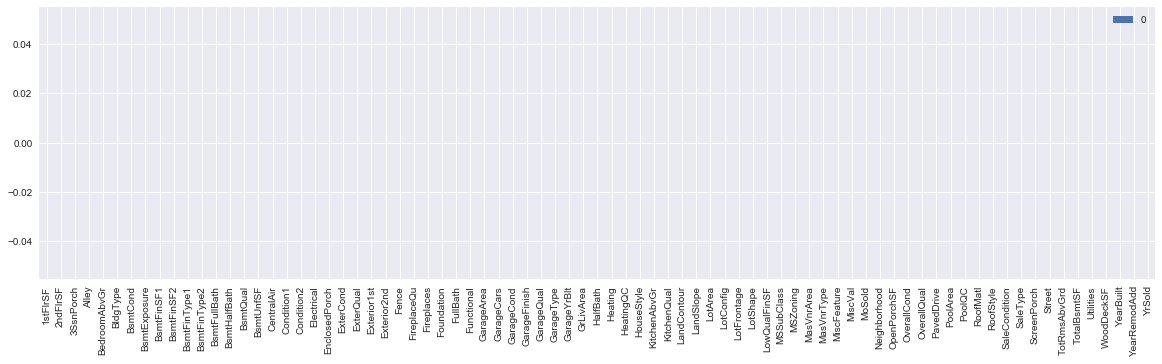

In [81]:
pd.DataFrame(train_x.isna().sum()*100/train_x.shape[0]).plot.bar(figsize=(20,5))

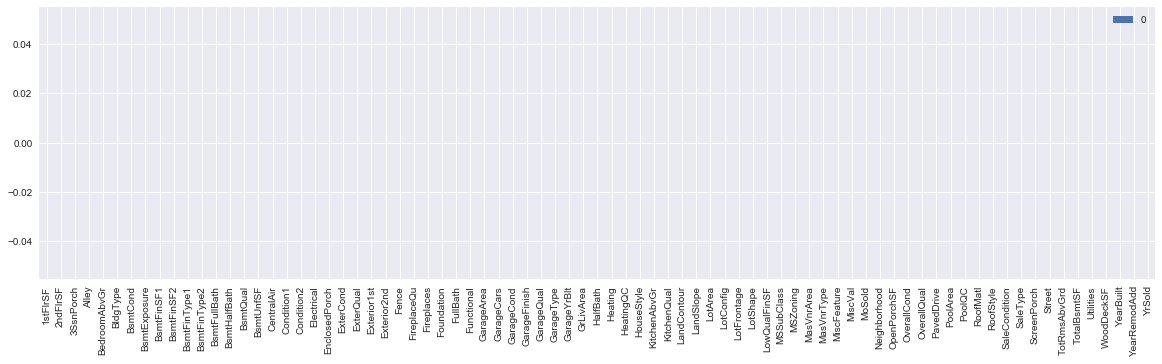

In [82]:
pd.DataFrame(test_x.isna().sum()*100/test_x.shape[0]).plot.bar(figsize=(20,5))

* We can see the data is totally clean and now we can do the feature engineering

### FEATURE ENGINEERING 

In [83]:
#converting years into age 
currentYear = datetime.now().year

In [84]:
train_x['Age_House']=currentYear-train_x['YearBuilt']
train_x['Age_Renovation']=currentYear-train_x['YearRemodAdd']
train_x['Garage_age']=currentYear-train_x['GarageYrBlt']
train_x = train_x.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

In [85]:
test_x['Age_House']=currentYear-test_x['YearBuilt']
test_x['Age_Renovation']=currentYear-test_x['YearRemodAdd']
test_x['Garage_age']=currentYear-test_x['GarageYrBlt']
test_x = test_x.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

In [86]:
train_data = pd.concat([train_y, train_x], axis=1)

## EDA

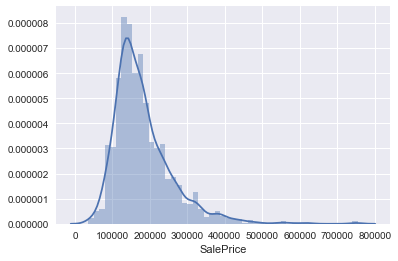

In [87]:
sns.distplot(train_y)

#Deviate from the normal distribution.
#Have appreciable positive skewness.

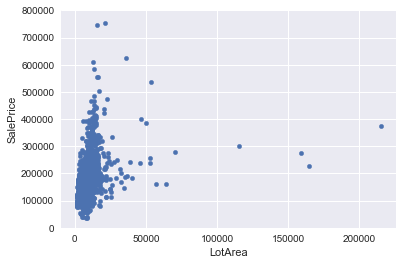

In [88]:
train_data.plot.scatter(x='LotArea', y='SalePrice', ylim=(0,800000))

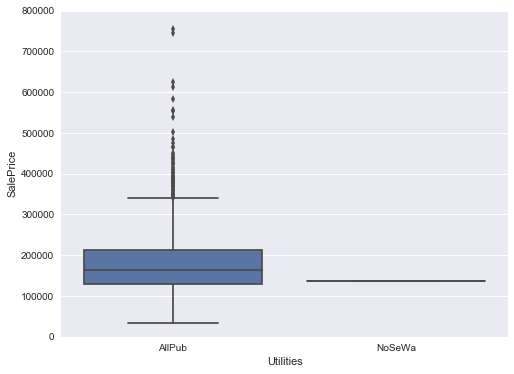

In [89]:
#box plot overallqual/saleprice
var = 'Utilities'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

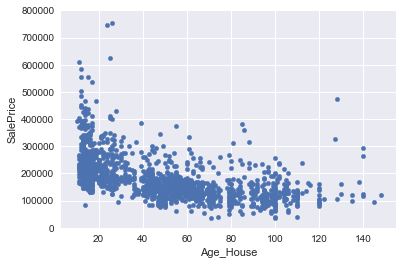

In [90]:
train_data.plot.scatter(x='Age_House', y='SalePrice', ylim=(0,800000))

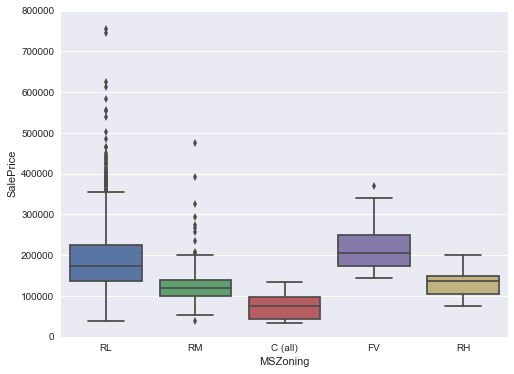

In [91]:
#box plot overallqual/saleprice
var = 'MSZoning'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

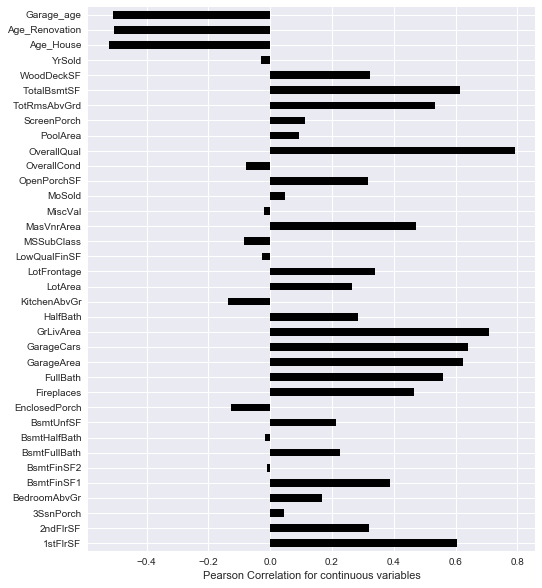

In [92]:
result = pd.concat([train_x, train_y], axis=1)
Corr = result.corr().iloc[:-1,-1]

fig, ax_ = plt.subplots(figsize=(8, 10))
_ =  Corr.plot(kind='barh', ax=ax_, colormap='gnuplot')
_ = ax_.set_xlabel('Pearson Correlation for continuous variables')

## BASIC DEFUALT GBM MODEL

In [93]:
#DIVIDING THE TEST DATASET INTO TWO PARTS
#So we can do the grid search CV to find the best parameters

In [94]:
y_name = 'SalePrice'
x_names = list(train_data.columns.values)
x_names= x_names.remove('SalePrice')

predictors = x_names
response = "SalePrice"

In [95]:
from sklearn.model_selection import train_test_split
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
SEED                    = 1111   # global random seed for better reproducibility

h2o.init(max_mem_size='24G', nthreads=4) # start h2o with plenty of memory and threads
h2o.remove_all()                         # clears h2o memory
h2o.no_progress()                        # turn off h2o progress indicators  

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,54 mins 21 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_vibhz_x1lj8t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,20.66 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [96]:
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.30, random_state=1111)

In [97]:
X_train = pd.concat([X_train, y_train], axis=1)
X_valid = pd.concat([X_valid, y_valid], axis=1)
X_train_hf = h2o.H2OFrame(X_train)
X_valid_hf = h2o.H2OFrame(X_valid)

In [98]:
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=X_train_hf)

In [99]:
#print(gbm)

In [100]:
perf = gbm.model_performance(X_valid_hf)
print(perf)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 589706080.4721779
RMSE: 24283.8646115518
MAE: 16085.176332188526
RMSLE: 0.12541715754244864
Mean Residual Deviance: 589706080.4721779



In [101]:
## Cross Validation

In [102]:
cv_gbm = H2OGradientBoostingEstimator(nfolds = 4, seed = 1111)
cv_gbm.train(x = predictors, y = response, training_frame = X_train_hf.rbind(X_valid_hf))

In [103]:
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
perf_cv = cv_gbm.model_performance(xval=True)

In [104]:
cv_summary

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,mae,16343.829,900.4629,16032.934,17062.436,17071.729,15208.218
1,mean_residual_deviance,8.127897E8,2.32672032E8,8.0080019E8,1.03636858E9,9.1900038E8,4.94989664E8
2,mse,8.127897E8,2.32672032E8,8.0080019E8,1.03636858E9,9.1900038E8,4.94989664E8
3,r2,0.8703117,0.031058317,0.87752736,0.86715317,0.8307093,0.9058569
4,residual_deviance,8.127897E8,2.32672032E8,8.0080019E8,1.03636858E9,9.1900038E8,4.94989664E8
5,rmse,28263.62,4313.941,28298.414,32192.68,30315.02,22248.363
6,rmsle,0.13604365,0.011073598,0.13795003,0.12571527,0.15079264,0.12971663


In [105]:
perf_cv


ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 819515289.5238277
RMSE: 28627.177463449443
MAE: 16370.066795262981
RMSLE: 0.13618789137076293
Mean Residual Deviance: 819515289.5238277


### GBM MODEL WITH FEW HYPERPARAMETERS TO GET A SENSE OF MODEL PERFORMANCE

In [106]:
#Gradient Boosting Machine (GBM)

# Prepare the hyperparameters
gbm_params = { 
                'max_depth':list(range(2,30,1))
                }



# Prepare the grid object
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,   # Model to be trained
                          grid_id='gbm_grid1',                  # Grid Search ID
                          hyper_params=gbm_params,              # Dictionary of parameters
                          search_criteria={"strategy": "Cartesian"}   # RandomDiscrete
                          )

# Train the Model
gbm_grid.train(x=predictors,y=response, 
                training_frame=X_train_hf, 
               validation_frame=X_valid_hf,
                ntrees=10000,      # Specify other GBM parameters not in grid
                score_tree_interval=5,     # For early stopping
                stopping_rounds=3,         # For early stopping
                stopping_tolerance=0.0005,
                seed=1)

In [107]:
# Find the Model grid performance 
gbm_gridperf = gbm_grid.get_grid(sort_by='RMSE',decreasing = False)
gbm_gridperf

     max_depth           model_ids                rmse
0            3   gbm_grid1_model_2   23811.76467273158
1            4   gbm_grid1_model_3  24067.757944000332
2            2   gbm_grid1_model_1   24162.34482149727
3            5   gbm_grid1_model_4  24438.086720645068
4            6   gbm_grid1_model_5  24880.292040748634
5           13  gbm_grid1_model_12  25049.746845450565
6           10   gbm_grid1_model_9   25157.98163747442
7           12  gbm_grid1_model_11  25189.581235384725
8           11  gbm_grid1_model_10   25278.01048519597
9            8   gbm_grid1_model_7  25349.952806277804
10          23  gbm_grid1_model_22   25437.31834726873
11          18  gbm_grid1_model_17   25439.03642174575
12          21  gbm_grid1_model_20  25440.095758350915
13          14  gbm_grid1_model_13   25446.70077512613
14          17  gbm_grid1_model_16  25448.056206153415
15          22  gbm_grid1_model_21   25468.79176536759
16          28  gbm_grid1_model_27  25482.897617496325
17        

In [108]:
#It appears that the max depth of 2 to 13 are best suited

## GBM ACTUAL MODEL

In [109]:
# Prepare the hyperparameters
params = {  
                'learn_rate': [0.01, 0.1], 
                'max_depth': list(range(2,13,2)),
                'sample_rate': [0.6,0.7,0.8,0.9], 
                'col_sample_rate': [0.6,0.7,0.8,0.9]
                }


# Prepare the grid object
grid = H2OGridSearch(model=H2OGradientBoostingEstimator,   # Model to be trained
                          grid_id='gbm_grid1',                  # Grid Search ID
                          hyper_params=params,              # Dictionary of parameters
                          search_criteria={"strategy": "Cartesian"}   # RandomDiscrete
                          )

# Train the Model
grid.train(x=predictors,y=response, 
                training_frame=X_train_hf, 
               validation_frame=X_valid_hf,
                ntrees=10000,      # Specify other GBM parameters not in grid
                score_tree_interval=5,     # For early stopping
                stopping_rounds=3,         # For early stopping
                stopping_tolerance=0.0005,
                seed=1)

In [110]:
# Identify the best model generated with least error
sorted_final_grid = grid.get_grid(sort_by='RMSE',decreasing = False)
best_model = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])

In [124]:
gbm = best_model

gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])

params = gbm.params
 
gbm_best = H2OGradientBoostingEstimator()


X_train = h2o.H2OFrame(train_data)
gbm_best.train(x=predictors, y=response, training_frame=X_train)       
        

In [125]:
print(gbm_best.model_performance())


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 172251906.93140787
RMSE: 13124.477396506418
MAE: 8949.43018782106
RMSLE: 0.07979275642688732
Mean Residual Deviance: 172251906.93140787



In [126]:
X_test_hf = h2o.H2OFrame(test_x)
preds = gbm_best.predict(X_test_hf)

In [128]:
preds.head(10)

predict
125972
153824
187439
189278
187053
177776
169934
170736
183622
129885
